# 8. Data aggregation and derivation
## Tables of Contents
***

**1. Data aggregation**<br/>
    - Maximun order <br/>
    - Avgerge order price<br/>
    - Median of order regularity<br/>
<br/>
**2. Data Derivation**<br/>
    - Product pricer range<br/>
    - The busiest day and the least busy day<br/>
    - Order number in certain period the day<br/>
    - Order volume flag<br/>
    - Consumer type<br/>
    - Spender type<br/>
    - Loyalty status<br/>
    - Regions<br/>
    - Income group<br/>
    - Age group<br/>
    - Dependants' status<br/>
<br/>
**3. Visualizations**<br/>
    - Average order price distribution<br/>
    - Product price distribution<br/>
    - Order hour distribution<br/>
    - Order day of week distribution<br/>
    - Maximum order distribution<br/>
    - Order regularity distribution<br/>
    - Total sales by order hour of day<br/>
***


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [ ]:
# Create a path
path = r'/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)'

In [ ]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data','updated_df_for_new_derivations.pkl'))

# Remove maximum columns display
pd.options.display.max_columns = None

# Check data output
df.head(10)

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,region,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages


### Aggregating 'order_number' with transform method

In [ ]:
# Transform the ‘order_number’ column by applying the transform method from the NumPy library to create new column
df ['max_order'] = df.groupby ('user_id')  ['order_number'].transform('max')

# Check output
df.head(15)

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,region,department,max_order
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10


### Aggregating 'days_since_last_order' with transform method

In [ ]:
# Transform the ‘days_since_last_order’ column by applying the transform method from the NumPy library to create new column
df['median_of_regularity'] = df.groupby('user_id') ['days_since_last_order'].transform('median')

# Check output
df.head(15)

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,region,department,max_order,median_of_regularity
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.000000,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5


### Aggregating 'prices' with transform method

In [ ]:
# Transform the ‘price’ column by applying the transform menthod from the NumPy library to create new column
df['avg_order_price'] = df.groupby('user_id') ['prices'].transform('mean')

# Check output

df.head(5)

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,region,department,max_order,median_of_regularity,avg_order_price
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5,6.367535
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5,6.367535
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5,6.367535
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5,6.367535
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,10,20.5,6.367535


### Deriving 'price_range' segmentation by label indexing

In [ ]:
# Create price_range flags
df.loc[df['prices'] > 15, 'price_range'] = 'high-range product'
df.loc[(df['prices'] <= 15) & (df['prices'] > 8), 'price_range'] = 'mid-range product'
df.loc[df['prices'] <= 8, 'price_range'] = 'low-range product'


# Check value counts
df['price_range'].value_counts(dropna=False)

,count
price_range,
low-range product,16833550
mid-range product,13733061
high-range product,393076


In [ ]:
# Get the frequence to know which day most orders take place
df['order_day_of_the_week'].value_counts(dropna = False)

,count
order_day_of_the_week,
0,5907809
1,5410804
6,4290733
5,4033036
2,4024012
3,3668899
4,3624394


### Deriving 'busiest_day' segmentation by if-statement within a lambda function

In [ ]:
# Derive from order_day_of_the_week to find the busiest and least busy day
df['busiest_day'] = df['order_day_of_the_week'].apply(
    lambda x: 'busiest day' if x == 0 else ('least busy day' if x == 4 else 'regular day'))

# Check output
df['busiest_day'].value_counts(dropna = False)


,count
busiest_day,
regular day,21427484
busiest day,5907809
least busy day,3624394


### Deriving 'busiest_period_of_day' segmentation by if-statement within a lambda function

In [ ]:
# Derive from order_hour_of_day to find the busiest and least busy hour
df['busiest_period_of_day'] = df['order_hour_of_day'].apply(
    lambda x: 'most orders' if x in {9,16,12,13,14,15,11,10} else ('fewest orders' if x in {5,2,4,3} else 'average orders'))

# Check output

df['busiest_period_of_day'].value_counts(dropna = False)

,count
busiest_period_of_day,
most orders,20177678
average orders,10532394
fewest orders,249615


### Deriving 'order_volume_flag' segmentation by label-based indexing

In [ ]:
# Categorize customers into order volume groups based on their maximum order number using .loc[]

# - Assign 'high volume' flag to customers with 30 or more maximum orders.
df.loc[df['max_order'] >= 30, 'order_volume_flag'] = 'high volume'

# - Assign 'regular volume' flag to customers with maximum orders between 6 and 29.
df.loc[(df['max_order'] < 30) & (df['max_order'] > 5), 'order_volume_flag'] = 'regular volume'

# - Assign 'low volume' flag to customers with 5 or fewer maximum orders.
df.loc[df['max_order'] <= 5, 'order_volume_flag'] = 'low volume'

# Check output
df['order_volume_flag'].value_counts(dropna = False)

,count
order_volume_flag,
regular volume,15507461
high volume,14659247
low volume,792979


### Deriving 'consumer_type' segmentation by label indexing

In [ ]:
# Categorize customers into consumer groups based on their order regularity using .lod[]
df.loc [df['median_of_regularity'] < 8, 'consumer_type'] = 'recurring consumer'
df.loc [ (df['median_of_regularity'] >= 8) & (df['median_of_regularity'] < 14), 'consumer_type'] = 'occasional consumer'
df.loc[ df['median_of_regularity'] >= 14, 'consumer_type'] = 'infrequent consumer'

# Check value counts
df['consumer_type'].value_counts(dropna=False)

,count
consumer_type,
recurring consumer,15638185
occasional consumer,8630372
infrequent consumer,6691130


### Deriving 'spender_type' segmentation by if-statement with for-loops

In [ ]:
# Calculate the threshold for spender type
avg_order_price_mean = df['avg_order_price'].mean()
avg_order_price_std = df['avg_order_price'].std()

# Assign value threshold
threshold = avg_order_price_mean + avg_order_price_std


In [ ]:
# Initialize an empty list to store the spending category for each customer.
result = []

# Iterate through the 'avg_order_price' column of the DataFrame.
for value in df['avg_order_price']:
  # If the average order price is greater than or equal to the threshold, categorize as 'high spender'.
  if value >= threshold:
    result.append('high spender')
  # If the average order price is less than the threshold, categorize as 'low spender'.
  elif value < threshold:
    result.append('low spender')

# Assign the spender types to a new column
df['spender_type'] = result

In [ ]:
df['spender_type'].value_counts( dropna=False )

,count
spender_type,
low spender,26856120
high spender,4103567


### Deriving 'loyalty_flag' by categorizing customer loyalty based on 'order volume', 'spending type', and 'consumer type' using conditional assignments and label-based indexing

In [ ]:
# Initialize the 'loyalty_flag' column with a default value of 'Not Loyal' for all customers.
df['loyalty_flag'] = 'Not Loyal'

# Assign 'Loyal' label to customers meeting specific criteria using .loc[] for label-based indexing:
# - Customers with high or regular order volume ('order_volume_flag').
# - Customers categorized as high spenders ('spender_type').
# - Customers identified as recurring consumers ('consumer_type').
df.loc[(df['order_volume_flag'].isin(['high volume', 'regular volume'])) &
          (df['spender_type'] == 'high spender') &
          (df['consumer_type'] == 'recurring consumer'), 'loyalty_flag'] = 'Loyal'

# Check results
df['loyalty_flag'].value_counts(dropna=False)

,count
loyalty_flag,
Not Loyal,29097060
Loyal,1862627


### Deriving region variable from state

In [ ]:
# Assign northeast region
df.loc[ df ['state'] == 'Maine', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New Hampshire', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Vermont', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Massachusetts', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Rhode Island', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Connecticut', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New York', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New Jersey', 'region'] = 'Northeast'

# Assign midwest region
df.loc[ df ['state'] == 'Wisconsin', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Michigan', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Illinois', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Indiana', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Ohio', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'North Dakota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'South Dakota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Nebraska', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Kansas', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Minnesota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Iowa', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Missouri', 'region'] = 'Midwest'

# Assign south region
df.loc[ df ['state'] == 'Delaware', 'region'] = 'South'
df.loc[ df ['state'] == 'Maryland', 'region'] = 'South'
df.loc[ df ['state'] == 'District of Columbia', 'region'] = 'South'
df.loc[ df ['state'] == 'Virginia', 'region'] = 'South'
df.loc[ df ['state'] == 'West Virginia', 'region'] = 'South'
df.loc[ df ['state'] == 'North Carolina', 'region'] = 'South'
df.loc[ df ['state'] == 'South Carolina', 'region'] = 'South'
df.loc[ df ['state'] == 'Georgia', 'region'] = 'South'
df.loc[ df ['state'] == 'Florida', 'region'] = 'South'
df.loc[ df ['state'] == 'Kentucky', 'region'] = 'South'
df.loc[ df ['state'] == 'Tennessee', 'region'] = 'South'
df.loc[ df ['state'] == 'Mississippi', 'region'] = 'South'
df.loc[ df ['state'] == 'Alabama', 'region'] = 'South'
df.loc[ df ['state'] == 'Oklahoma', 'region'] = 'South'
df.loc[ df ['state'] == 'Texas', 'region'] = 'South'
df.loc[ df ['state'] == 'Arkansas', 'region'] = 'South'
df.loc[ df ['state'] == 'Louisiana', 'region'] = 'South'

# Assign west region
df.loc[ df ['state'] == 'Idaho', 'region'] = 'West'
df.loc[ df ['state'] == 'Montana', 'region'] = 'West'
df.loc[ df ['state'] == 'Wyoming', 'region'] = 'West'
df.loc[ df ['state'] == 'Nevada', 'region'] = 'West'
df.loc[ df ['state'] == 'Utah', 'region'] = 'West'
df.loc[ df ['state'] == 'Colorado', 'region'] = 'West'
df.loc[ df ['state'] == 'Arizona', 'region'] = 'West'
df.loc[ df ['state'] == 'New Mexico', 'region'] = 'West'
df.loc[ df ['state'] == 'Alaska', 'region'] = 'West'
df.loc[ df ['state'] == 'Washington', 'region'] = 'West'
df.loc[ df ['state'] == 'Oregon', 'region'] = 'West'
df.loc[ df ['state'] == 'California', 'region'] = 'West'
df.loc[ df ['state'] == 'Hawaii', 'region'] = 'West'


In [ ]:
# Check region counts
df['region'].value_counts(dropna=False)

,count
region,
South,10309442
West,7926057
Midwest,7260306
Northeast,5463882


### Deriving customer income segmentation by regional median wage

In [ ]:
# Create income-based customer segmentation by regional median personal income

def income_label(row):
    """
    Categorizes a customer's income level based on their income and region.

    Args:
        row (pandas.Series): A row from a pandas DataFrame representing a customer.

    Returns:
        str: The income category ('low-income', 'middle-income', 'high-income', or 'NAN').
    """

    # Northeast region income categorization
    if row['income'] <= 45530 and row['region'] == 'Northeast':
        return 'low-income'
    elif row['income'] > 45530 and row['income'] <= 150000 and row['region'] == 'Northeast':
        return 'middle-income'
    elif row['income'] > 150000 and row['region'] == 'Northeast':
        return 'high-income'

    # West region income categorization
    elif row['income'] <= 42930 and row['region'] == 'West':
        return 'low-income'
    elif row['income'] > 42930 and row['income'] <= 150000 and row['region'] == 'West':
        return 'middle-income'
    elif row['income'] > 150000 and row['region'] == 'West':
        return 'high-income'

    # Midwest region income categorization
    elif row['income'] <= 44100 and row['region'] == 'Midwest':
        return 'low-income'
    elif row['income'] > 44100 and row['income'] <= 150000 and row['region'] == 'Midwest':
        return 'middle-income'
    elif row['income'] > 150000 and row['region'] == 'Midwest':
        return 'high-income'

    # South region income categorization
    elif row['income'] <= 40670 and row['region'] == 'South':
        return 'low-income'
    elif row['income'] > 40670 and row['income'] <= 150000 and row['region'] == 'South':
        return 'middle-income'
    elif row['income'] > 150000 and row['region'] == 'South':
        return 'high-income'

    # If none of the above conditions match, return 'NAN' (Not a Number)
    else:
        return 'NAN'

In [ ]:
# Derive the 'income_group' column by applying the user-defined 'income_label' function to each row (axis=1).
df['income_group'] = df.apply(income_label, axis=1)

In [ ]:
# Check output
df['income_group'].value_counts(dropna=False)

,count
income_group,
middle-income,24968453
high-income,3890840
low-income,2100394


### Deriving 'age_group' segmentation by label indexing

In [ ]:
# Categorize customers into age groups based on their age:
# - Customers under 25 are classified as 'young_adult'.
# - Customers between 25 and 39 (inclusive) are classified as 'adult'.
# - Customers between 40 and 59 (inclusive) are classified as 'middle-aged'.
# - Customers 60 and older are classified as 'senior'.

df.loc[df['age'] < 25 , 'age_group'] = 'young_adult'
df.loc[(df['age'] >= 25) & (df['age'] < 40), 'age_group'] = 'adult'
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age_group'] = 'middle-aged'
df.loc[df['age'] >= 60, 'age_group'] = 'senior'

# Check output
df['age_group'].value_counts(dropna=False)


,count
age_group,
senior,10572857
middle-aged,9723390
adult,7248839
young_adult,3414601


### Deriving 'dependants_flag' segmentation by label based indexing

In [ ]:
# Categorize customers into groups based on their dependants' status
df.loc[df['n_dependants'] > 0 ,'dependants_flag'] = 'With dependants'
df.loc[df['n_dependants'] == 0 ,'dependants_flag'] = 'No dependants'

# Check output
df['dependants_flag'].value_counts(dropna=False)

,count
dependants_flag,
With dependants,23221179
No dependants,7738508


### Visualizations

In [ ]:
# Check statistics
df['avg_order_price'].describe()

,avg_order_price
count,3.095969e+07
mean,7.790460e+00
std,7.216613e-01
min,1.000000e+00
25%,7.385033e+00
50%,7.812096e+00
75%,8.223986e+00
max,2.011384e+01


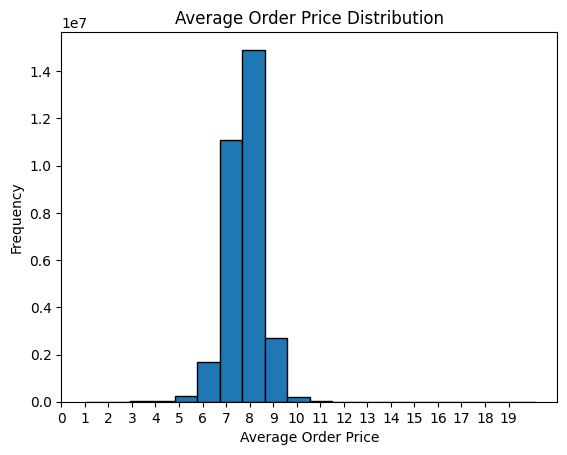

In [ ]:
# Plot a histogram
df['avg_order_price'].plot.hist(bins=20, ec='black', lw=1)

# Formatting
plt.title('Average Order Price Distribution')
plt.xlabel('Average Order Price')
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel('Frequency')

# Export the figure
plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Variable Distributions/avg_order_price_distribution.png', bbox_inches='tight')

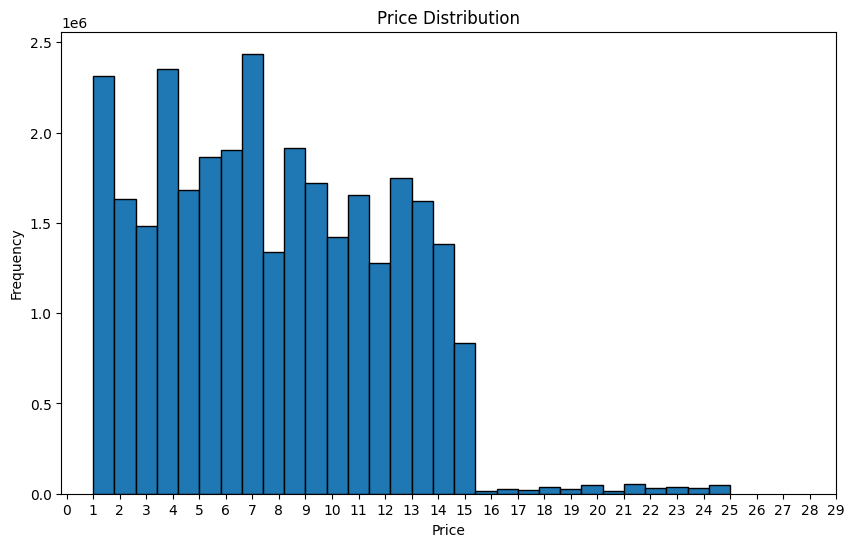

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a histogram
df['prices'].plot.hist(bins=30 , ec='black', lw=1)

# Formatting
plt.title('Price Distribution')
plt.xlabel('Price')
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Frequency')

# Export the figure
plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Variable Distributions/price_distribution.png', bbox_inches='tight')

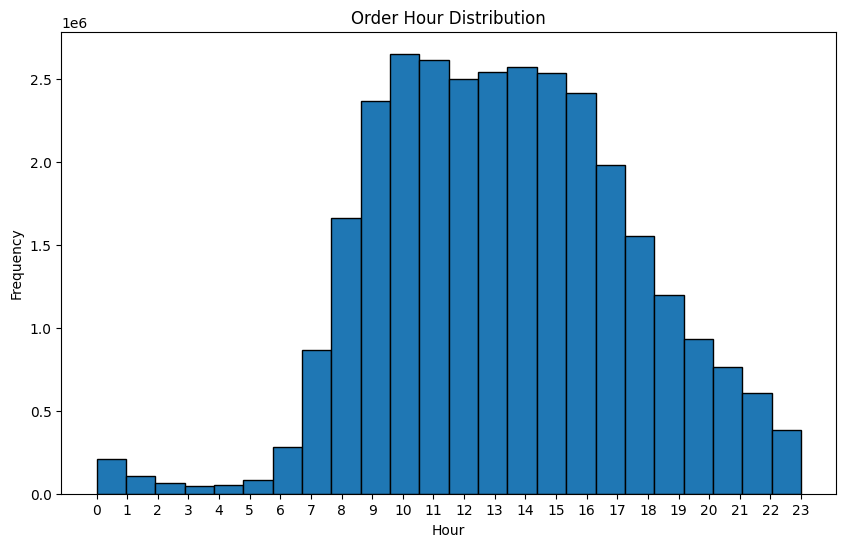

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a histogram
df['order_hour_of_day'].plot.hist(bins=24 , ec='black', lw=1)

# Formatting
plt.title('Order Hour Distribution')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel('Frequency')

# Export the figure
plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Variable Distributions/order_hour_distribution.png', bbox_inches='tight')

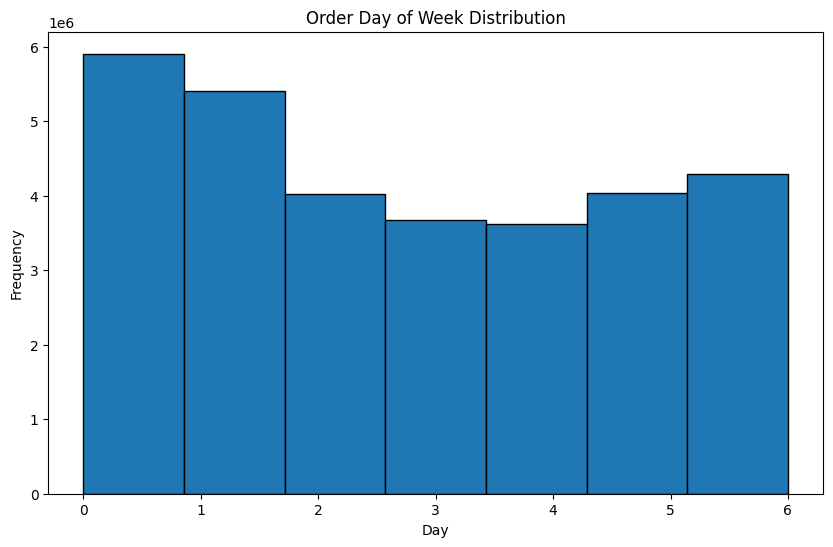

In [ ]:
# # Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a histogram
df['order_day_of_the_week'].plot.hist(bins=7 , ec='black', lw=1)

# Formatting
plt.title('Order Day of Week Distribution')
plt.xlabel('Day')
plt.xticks(np.arange(0, 7, step=1))
plt.ylabel('Frequency')

# Export the figure
plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Variable Distributions/order_day_distribution.png', bbox_inches='tight')

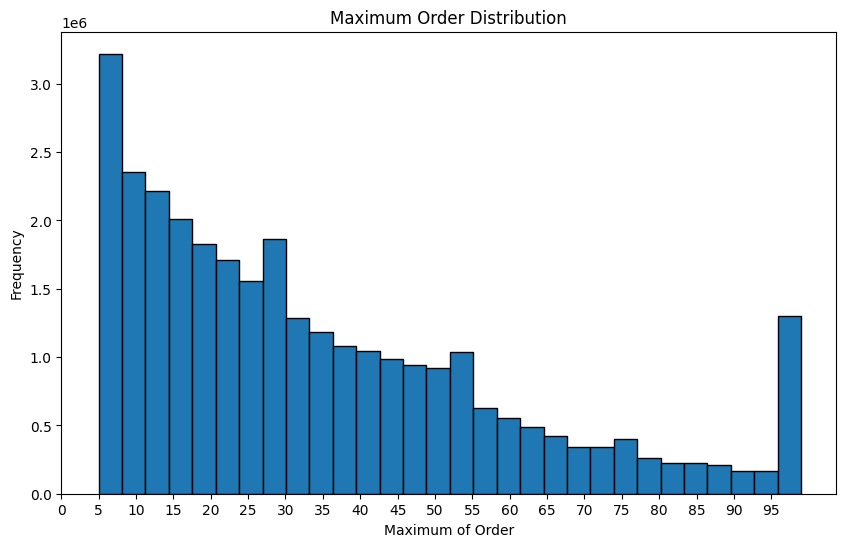

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

#  Plot a histogram
df['max_order'].plot.hist(bins=30 , ec='black', lw=1)

plt.title('Maximum Order Distribution')
plt.xlabel('Maximum of Order')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('Frequency')

plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Variable Distributions/max_order_distribution.png', bbox_inches='tight')

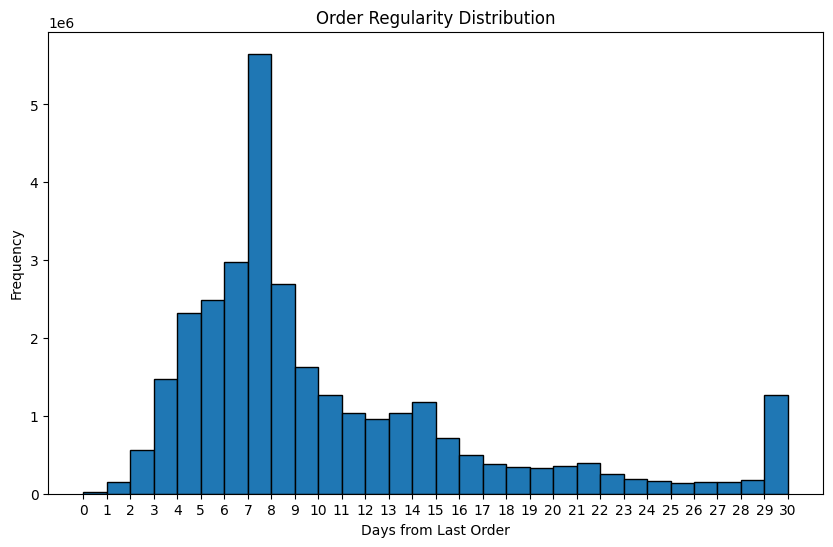

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a histogram
df['median_of_regularity'].plot.hist(bins=30 , ec='black', lw=1)

# Formatting
plt.title('Order Regularity Distribution')
plt.xlabel('Days from Last Order')
plt.xticks(np.arange(0, 31, step=1))
plt.ylabel('Frequency')

# Export the figure
plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Variable Distributions/order_regularity_distribution.png', bbox_inches='tight')

In [ ]:
# Check statistics
df['prices'].describe()

,prices
count,3.095969e+07
mean,7.790460e+00
std,4.240455e+00
min,1.000000e+00
25%,4.199219e+00
50%,7.398438e+00
75%,1.129688e+01
max,2.500000e+01


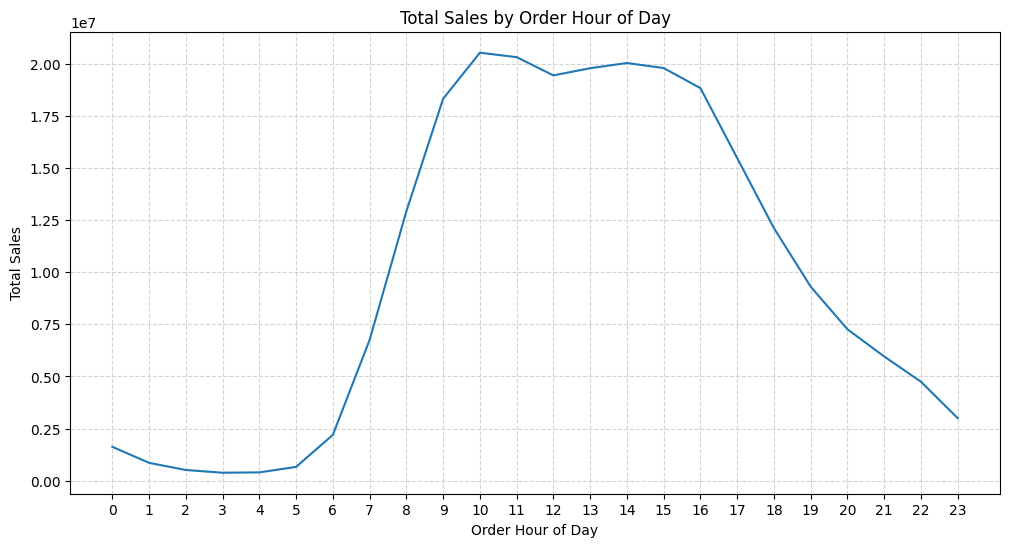

In [ ]:
# Plot a line chart with sum of prices
hourly_sales = df.groupby('order_hour_of_day')['prices'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(data=hourly_sales, x='order_hour_of_day', y='prices')

# Customize the plot
plt.title('Total Sales by Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.xticks(range(0,24))
plt.ylabel('Total Sales')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig('/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)/04 Analysis/Visualizations/Hourly_Sales_line_chart.png', dpi=300, bbox_inches='tight')


In [ ]:
# Export the data
df.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data','ready_ords_prods_cus_depts.pkl'))